Étape 1 — Fusion des listings

In [3]:
import os
os.getcwd()


'c:\\Users\\Asus tuf\\Desktop\\projet-fil-rouge-airbnb-maroc\\notebooks'

In [4]:
import os
os.listdir()


['01_listings_merge.ipynb']

In [5]:
import pandas as pd

madrid = pd.read_csv("../data/raw/madrid/listings.csv")
barcelona = pd.read_csv("../data/raw/barcelona/listings (1).csv")

madrid["city"] = "Madrid"
barcelona["city"] = "Barcelona"

df_listings = pd.concat([madrid, barcelona], ignore_index=True)

print(df_listings.shape)
df_listings.head()


(44410, 19)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
0,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,NaN,4,33,2018-07-15,0.25,2,198,0,NaN,Madrid
1,30320,Apartamentos Dana Sol,130907,Danuta Weronika,Centro,Sol,40.41476,-3.70418,Entire home/apt,157.0,5,173,2025-08-27,0.93,17,342,1,NaN,Madrid
2,30959,Beautiful loft in Madrid Center,132883,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,8,2017-05-30,0.06,1,0,0,NaN,Madrid
3,40916,Apartasol Apartamentos Dana,130907,Danuta Weronika,Centro,Universidad,40.42247,-3.70577,Entire home/apt,143.0,5,53,2025-09-11,0.29,17,341,4,NaN,Madrid
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Arturo,Centro,Justicia,40.41884,-3.69655,Private room,65.0,1,249,2025-09-05,2.78,3,299,41,NaN,Madrid


In [6]:
# Vérifier valeurs manquantes
df_listings.isnull().sum().sort_values(ascending=False)


license                           21292
price                             10181
last_review                       10136
reviews_per_month                 10136
host_name                           102
id                                    0
name                                  0
host_id                               0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
minimum_nights                        0
room_type                             0
longitude                             0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
city                                  0
dtype: int64

In [7]:
df_listings["price"].head(10)


0      NaN
1    157.0
2      NaN
3    143.0
4     65.0
5      NaN
6    116.0
7     79.0
8    300.0
9      NaN
Name: price, dtype: float64

In [8]:
# Supprimer les lignes sans prix
df_listings = df_listings.dropna(subset=["price"])

print("Nouvelle shape :", df_listings.shape)


Nouvelle shape : (34229, 19)


In [9]:
df_listings["price"].describe()


count    34229.000000
mean       170.357358
std        439.909086
min          8.000000
25%         70.000000
50%        116.000000
75%        187.000000
max      25654.000000
Name: price, dtype: float64

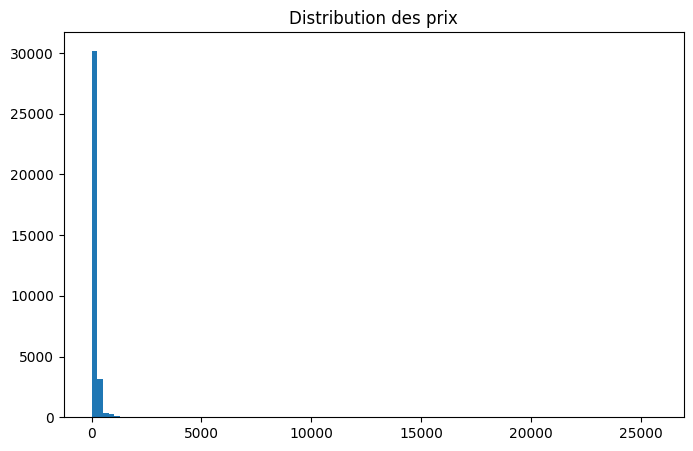

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_listings["price"], bins=100)
plt.title("Distribution des prix")
plt.show()


In [11]:
df_listings["price"].describe()


count    34229.000000
mean       170.357358
std        439.909086
min          8.000000
25%         70.000000
50%        116.000000
75%        187.000000
max      25654.000000
Name: price, dtype: float64

In [12]:
import numpy as np

p99 = np.percentile(df_listings["price"], 99)
print("99e percentile :", p99)


99e percentile : 974.0


In [13]:
df_listings = df_listings[df_listings["price"] <= p99]

print("Nouvelle shape :", df_listings.shape)
df_listings["price"].describe()


Nouvelle shape : (33887, 19)


count    33887.000000
mean       144.862366
std        115.639802
min          8.000000
25%         69.500000
50%        115.000000
75%        184.000000
max        974.000000
Name: price, dtype: float64

Prix moyen par ville

In [14]:
df_listings.groupby("city")["price"].mean()


city
Barcelona    158.255812
Madrid       134.156428
Name: price, dtype: float64

Médiane par ville

In [15]:
df_listings.groupby("city")["price"].median()


city
Barcelona    129.0
Madrid       110.0
Name: price, dtype: float64

Nombre de logements par ville

In [16]:
df_listings["city"].value_counts()


city
Madrid       18833
Barcelona    15054
Name: count, dtype: int64

Prix par type de logement

In [17]:
df_listings.groupby(["city", "room_type"])["price"].mean().sort_values(ascending=False)


city       room_type      
Barcelona  Hotel room         223.940000
           Entire home/apt    191.604005
Madrid     Entire home/apt    157.632402
           Hotel room         151.097561
Barcelona  Private room        85.007809
           Shared room         76.207547
Madrid     Private room        73.937057
           Shared room         46.421769
Name: price, dtype: float64

Distribution des prix par ville

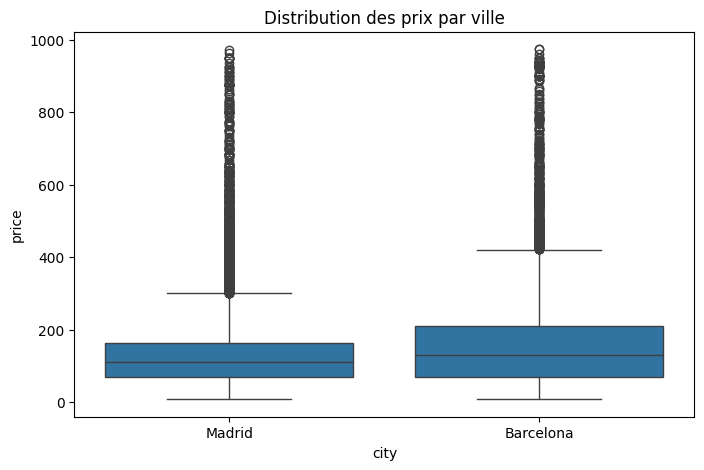

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df_listings, x="city", y="price")
plt.title("Distribution des prix par ville")
plt.show()
